In [29]:
import random 
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode, variance

# Attack Phase

In [12]:
def expected_loops(n): 
    '''Implementation of formula in rubric for E[L_n]'''
    total = 0
    for i in range(1,n+1): 
        total += 1/(2*i-1)

    return total

print(expected_loops(100))
print(expected_loops(100000))

def expected_loops_square(n):
    '''Implementation of formula in rubric for E[L_n^2]'''

    expected = expected_loops(n)
    total = 0 
    for i in range(1,n+1):
        for j in range(1,i):
            total += (2/(2*i-1))*(1/(2*j-1))
    
    return total + expected

def var_loops(n):
    '''Implementation of formula in rubric for var(L_n)'''
    return expected_loops_square(n) - (expected_loops(n))**2

print(var_loops(100))

3.2843421893016322
6.738217745497863
2.053141618332875


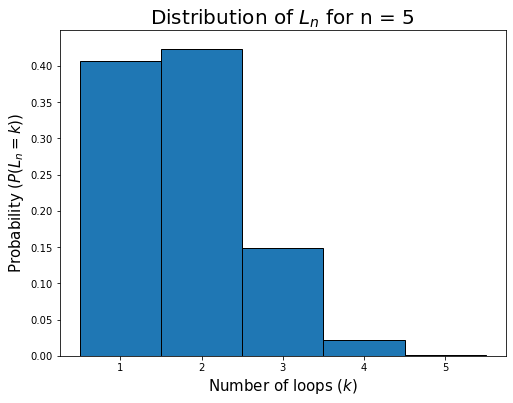

In [13]:
def combinations(n, k):
    '''Return all possible ordered combinations for i_1,...i_{k-1}
       to sum over in loop_dsitribution'''
    def backtrack(start, k, path, result):
        '''Function for recursion'''
        if k == 0:
            result.append(path[:])
            return
        for i in range(start, n+1):
            path.append(i)
            backtrack(i + 1, k - 1, path, result)
            path.pop()
    
    result = []
    backtrack(2, k-1, [], result)
    return result

def loop_distribution(n,k):
    '''Returns P(L_n = k) using formula found in rubric'''
    total =  0 
    #initialise all possible combos of i_values for the k sums 
    ranges = combinations(n,k)
    
    for i_vals in ranges: 
        prod = 1
        for j in range(1,k):
            prod *= 1/(2*i_vals[j-1]-1)
        for j in range(2,n+1): 
            if j not in i_vals: 
                prod *= (2*j-2)/(2*j-1)
        total += prod
    
    return total

def plot_distribution(n):
    '''Plots the distribution of L_n given a value of n'
        warning - computationally expensive for large values of n'''
    k_values = list(range(1,n+1))
    probabilities = [loop_distribution(n,k) for k in k_values]
    
    plt.figure(figsize=(8,6))
    #only integer values on x axis
    plt.title(f'Distribution of $L_n$ for n = {n}', fontsize = 20)
    plt.xticks(range(1,n+1))
    plt.yticks(np.arange(0,0.45,0.05))
    plt.ylim(0,0.45)
    plt.xlabel(f'Number of loops ($k$)', fontsize=15)
    plt.ylabel(f'Probability ($P(L_n = k)$)', fontsize=15)
    
    
    
    plt.bar(k_values, probabilities, width=1, edgecolor='k')
    
    
    
    

    
    probabilities = [x.count(k)/n for k in range(k_values)]
    
    
    
    plt.show()
    
    return None 

plot_distribution(5)

In [2]:
class String(): 
    
    def __init__(self, length):
        self.length = length 
        
    def copy(self):
        return String(self.length)
            
class Bowl():
    
    def __init__(self, n): 
        self.n = n 
        self.strings = [String(1) for _ in range(n)]
        self.loops = []
        self.move_count = 0 
    
    def round_of_moves(self):
        '''Perform one round of the process
        -  choose two random open ends and tie them'''
        
        # Pick random string 
        string_1_index = random.randint(0,len(self.strings)-1)
        string_1 = self.strings[string_1_index]
        
        # Prob of picking other end of same string is 1/(2k-1)
        # where k number of strings (not loops)
        if random.randint(1,2*len(self.strings)-1) == 1: 
            # Form a loop 
            self.loops.append(string_1.copy())
        
            del self.strings[string_1_index]
            
        else: 
            # Choose a different string, combine these into a new string 
            string_2_index = random.choice([i for i in range(0,len(self.strings)) if i != string_1_index])
            string_2 = self.strings[string_2_index]
            
            # Create a new string
            
            new_length = string_1.length + string_2.length
            new_string = String(new_length)
            
            #remove old strings 
            self.strings = [string for index, string in enumerate(self.strings) if 
                            index not in [string_1_index, string_2_index]]
            
            #add new string 
            self.strings.append(new_string)
            
        self.move_count += 1 
            
        return None 
    
    def end_process(self): 
        '''Perform n rounds such that only loops remain in the bowl'''
        while(self.move_count<self.n):
            self.round_of_moves()
        
        return None 
    
    def loop_lengths(self): 
        '''Return list containing length of all loops in bowl'''
        lengths = [loop.length for loop in self.loops]
        
        return lengths
  

In [ ]:
#Estimating mode of L_200

num_of_loops = []
n = 200

for i in range(10000):
    test_bowl = Bowl(n)
    test_bowl.end_process()
    num_of_loops.append(len(test_bowl.loop_lengths()))
    

print(num_of_loops.count(2))
print(num_of_loops.count(3))
print(mode(num_of_loops))

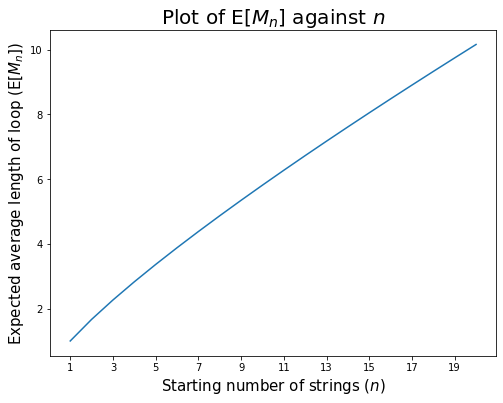

In [28]:
def expected_average_length(n):
    '''Implementation of formula for E[M_n] found in rubric
        warning - very memory intensive'''
    total = 0 
    for k in range(1, n+1): 
        total += loop_distribution(n,k) * (1/k)
    
    return n*total

#plot E[M_n] for 1 <= n <= 20 
n_values = np.arange(1,21)

expected_vals = []
for n in n_values:
    expected_vals.append(expected_average_length(n))

plt.figure(figsize=(8,6))
plt.title('Plot of E$[M_n]$ against $n$', fontsize=20)
plt.xlabel('Starting number of strings ($n$)', fontsize=15)
plt.xticks(range(1,n+1, 2))
plt.ylabel('Expected average length of loop (E$[M_n]$)', fontsize=15)
plt.plot(n_values, expected_vals)
plt.show()

# Review Phase

In [35]:
# Chcek E[L_n] and Var(L_n)

#number of samples 
N = 10000

#starting number of strings
n = 100 

loop_samples = []

for _ in range(N):
    bowl = Bowl(n)
    bowl.end_process()
    loop_samples.append(len(bowl.loop_lengths()))
    
print(np.mean(loop_samples))
print(variance(loop_samples))
    
    


3.2831
2.0479591859185917


In [51]:
# Check distribution of L_n

# Check, fixing a value of n, that the probabilities ranging over k sum to 1 
n = 5
total = 0 

for i in range(1,n+1):
    total += loop_distribution(n,i)
    
print(total)

0.9999999999999999


In [50]:
# Check E[M_n]

#number of samples 
N = 10000

#starting number of strings
n = 10 

length_samples = []

for _ in range(N):
    bowl = Bowl(n)
    bowl.end_process()
    length_samples.append(np.mean(bowl.loop_lengths()))
    
#sample mean
print(np.mean(length_samples))

#exact value using fomrula 
print(expected_average_length(n))

5.813584523809523
5.814832968888698


In [ ]:
# Extension 

#number of samples 
N = 10000

n_values = np.arange(1,200, 20)
estimates = []

for n in n_values:
    total = 0
    for _ in range(N): 
        bowl = Bowl(n)
        bowl.end_process()
        if 1 in bowl.loop_lengths():
            total += 1 
    estimates.append(total/N)
    
    

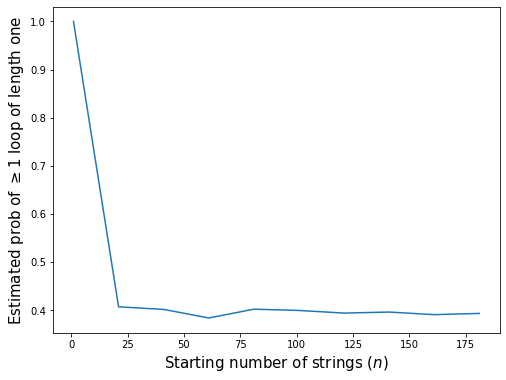

In [62]:
plt.figure(figsize=(8,6))
plt.xlabel('Starting number of strings ($n$)', fontsize=15)
plt.ylabel('Estimated prob of $\geq 1$ loop of length one', fontsize=15)
plt.plot(n_values, estimates)
plt.show()
    